# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 3 </span>

### Paolo Panatti (12606A)

### <font color="blue"> Esercizio 03.1

#### Obiettivo:
Stimare tramite una simulazione Monte Carlo il prezzo di un'opzione europea di tipo call e put al tempo $t=0$.

Un'**opzione europea** è un contratto tra due parti in cui il venditore dell'opzione (writer) garantisce al compratore dell'opzione (holder) il diritto di acquistare da lui (opzione call) o di vendergli (opzione put) un bene sottostante, che sul mercato ha un prezzo $S(t)$, ad un prezzo pattuito $K$ e ad una certa data $T$ nel futuro. In questo tipo di contratto, dunque, soltanto il writer ha un obbligo. L'holder eserciterà il suo diritto solo se guadagnerà un profitto, che è quindi dato da:
$$\text{profitto} = \max\left[0,S(T)-K\right] \quad \text{per una call}$$
$$\text{profitto} = \max\left[0,K-S(T)\right] \quad \text{per una put}$$
Ovviamente, per ottenere questo diritto, l'holder deve pagare un determinato compenso al writer.

Black e Scholes sono riusciti a calcolare analiticamente il valore di queste opzioni nell'ipotesi di mercato massimamente efficiente assumendo che l'evoluzione temporale del prezzo del bene sia stocastica e che segua un *moto browniano geometrico* (GBM) con tasso di interesse privo di rischio costante $r$ e volatilità $\sigma$.

Per stimare il prezzo di queste opzioni tramite tecniche numeriche, invece, occorre innanzitutto scontare il valore del profitto al tempo $T$ di un fattore $e^{-rT}$, dovuto all'interesse che la banca avrebbe garantito con un deposito al tempo $t=0$, e quindi calcolare il valore di aspettazione di questo profitto scontato sulla distribuzione dei prezzi del bene al tempo $T$:
$$C[S(0),0] = \langle e^{-rT} \max\left[0,S(T)-K\right] \rangle \quad \text{per una call}$$
$$P[S(0),0] = \langle e^{-rT} \max\left[0,K-S(T)\right] \rangle \quad \text{per una put}$$

L'esercizio chiedeva di svolgere la simulazione utilizzando i seguenti parametri:
- $S(0)=100$
- $T=1$
- $K=100$
- $r=0.1$
- $\sigma=0.25$

e in due modalità differenti:
##### 1. Campionamento diretto del prezzo finale del bene
Per un moto browniano geometrico con drift $\mu$ e volatilità $\sigma$: $S(t) = S(0) \exp\left[\left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$, dove $W(t) \sim \mathcal{N}(0,t)$ (processo di Wiener). Per campionare direttamente $S(T)$ basta dunque utilizzare la formula $S(T) = S(0) \exp\left[\left(r-\frac{1}{2}\sigma^2\right)T+\sigma z\sqrt{T}\right]$, con $z \sim \mathcal{N}(0,1)$.
##### 2. Campionamento discretizzato della traiettoria del prezzo del bene
Ho suddiviso l'intervallo $\left[0,T\right]$ in $100$ sottointervalli e campionato $S(t_i)$ tramite la formula ricorsiva:
$$S(t_{i+1}) = S(t_i) \exp\left[\left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$ con $z_{i+1} \sim \mathcal{N}(0,1)$.

In entrambi i casi ho campionato il prezzo finale del bene un totale di $M=10^5$ volte, utilizzando $N=100$ blocchi per valutare l'incertezza statistica. I grafici in basso rappresentano valori medi e incertezze progressive di $C[S(0),0]$ (caso diretto e discretizzato) e di $P[S(0),0]$ (caso diretto e discretizzato) in funzione del numero di lanci.

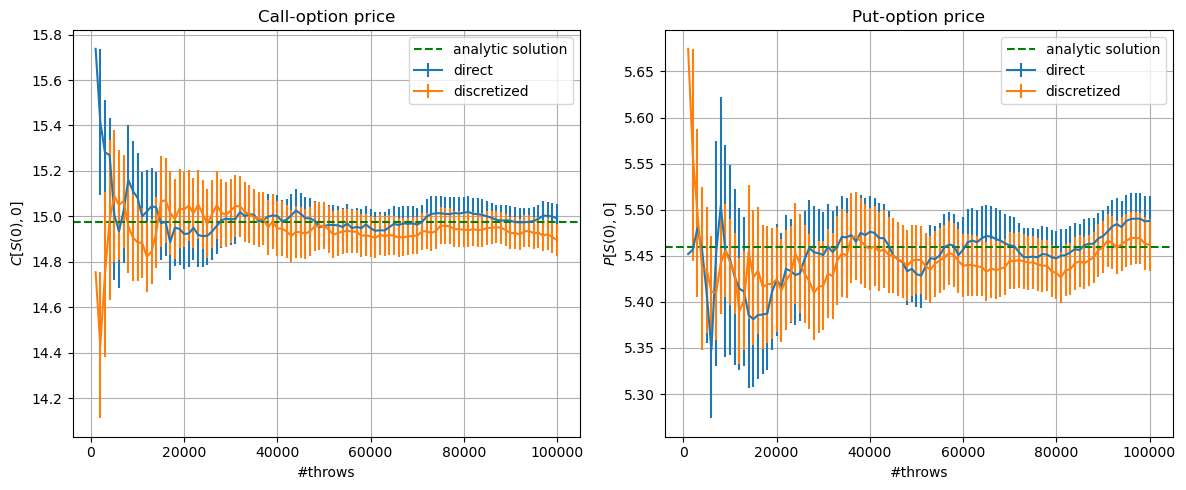

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M, N = np.loadtxt("data1.dat", max_rows=1, usecols=(0,1), delimiter=' ', unpack='true')
L = int(M/N)
x = np.arange(N)+1
x *= L

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sum_prog, err_prog = np.loadtxt("data1.dat", skiprows=1, usecols=(0,1), delimiter=' ', unpack='true')
axs[0].errorbar(x, sum_prog, yerr=err_prog, label='direct')
sum_prog, err_prog = np.loadtxt("data3.dat", usecols=(0,1), delimiter=' ', unpack='true')
axs[0].errorbar(x, sum_prog, yerr=err_prog, label='discretized')
axs[0].axhline(y=14.975790778311286, color='g', linestyle='--', label='analytic solution')
axs[0].set_xlabel('#throws')
axs[0].set_ylabel(r'$C[S(0),0]$')
axs[0].set_title('Call-option price')
axs[0].legend()
axs[0].grid(True)

sum_prog, err_prog = np.loadtxt("data2.dat", usecols=(0,1), delimiter=' ', unpack='true')
axs[1].errorbar(x, sum_prog, yerr=err_prog, label='direct')
sum_prog, err_prog = np.loadtxt("data4.dat", usecols=(0,1), delimiter=' ', unpack='true')
axs[1].errorbar(x, sum_prog, yerr=err_prog, label='discretized')
axs[1].axhline(y=5.4595325819072364, color='g', linestyle='--', label='analytic solution')
axs[1].set_xlabel('#throws')
axs[1].set_ylabel(r'$P[S(0),0]$')
axs[1].set_title('Put-option price')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Osserviamo che tutti i risultati ottenuti sono compatibili con le soluzioni analitiche ricavate da Black e Scholes. I due metodi sono equivalenti e conducono entrambi al risultato corretto.

### <font color="green"> Soluzioni analitiche di Black-Scholes:

- Call: $$C\left[S(t),t\right] = S(t) N(d_1) - K e^{-r(T-t)} N(d_2)$$
- Put: $$P\left[S(t),t\right] = S(t) \left[N(d_1)-1\right] - K e^{-r(T-t)} \left[N(d_2)-1\right]$$

dove $$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[\ln\left(\frac{S(t)}{K}\right)+\left(r+\frac{\sigma^2}{2}\right)(T-t)\right] \quad\quad d_2 = d_1 - \sigma\sqrt{T-t}$$
e $$N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[1+{\rm erf}\left(\frac{x}{\sqrt{2}}\right) \right]$$ è la cumulativa della Gaussiana $\mathcal{N}(0,1)$.

In [89]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t = 0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 * (N(d1) - 1.) - K * exp(-r * T) * (N(d2) - 1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES == ")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES == 
call:  14.975790778311286
put:  5.4595325819072364
